## 1.4.2 神经网络的实现

In [1]:
# 我们来实现一个具有一个隐藏层的神经网络
import sys

sys.path.append('..')

In [2]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [4]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        # 初始化权重和偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        # 将所有的权重和梯度整理到列表中
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    # 我们为 TwoLayerNet 实现 3 个方法，即进行推理的 predict() 方法、正向传播的 forward() 方法和反向传播的 backward() 方法
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [ ]:
"""
初始化程序接收 3 个参数。input_size 是输入层的神经元数，hidden_size 是隐藏层的神经元数，output_size 是输出层的神经元数。在内部实现中，首先用零向量（np.zeros()）初始化偏置，再用小的随机数（0.01 * np.random.randn()）初始化权重。通过将权重设成小的随机数，学习可以更容易地进行。接着，生成必要的层，并将它们整理到实例变量 layers 列表中。最后，将这个模型使用到的参数和梯度归纳在一起。
"""

## 1.4.3 学习用的代码

In [6]:
import sys

sys.path.append('..')

In [8]:
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

In [9]:
# 设定超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [10]:
# 读入数据，生成模型和优化器
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [11]:
# 学习用的变量
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [12]:
for epoch in range(max_epoch):
    # 打乱数据
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters * batch_size:(iters + 1) * batch_size]
        batch_t = t[iters * batch_size:(iters + 1) * batch_size]

    # 计算梯度，更新参数
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss += loss
    loss_count += 1

    # 定期输出学习过程
    if (iters + 1) % 10 == 0:
        avg_loss = total_loss / loss_count
        print('| epoch %d | iter %d / %d | loss %.2f'
              % (epoch + 1, iters + 1, max_iters, avg_loss))
        loss_list.append(avg_loss)
        total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.10
| epoch 2 | iter 10 / 10 | loss 1.12
| epoch 3 | iter 10 / 10 | loss 1.10
| epoch 4 | iter 10 / 10 | loss 1.08
| epoch 5 | iter 10 / 10 | loss 1.18
| epoch 6 | iter 10 / 10 | loss 1.22
| epoch 7 | iter 10 / 10 | loss 1.24
| epoch 8 | iter 10 / 10 | loss 1.13
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.20
| epoch 11 | iter 10 / 10 | loss 1.22
| epoch 12 | iter 10 / 10 | loss 1.22
| epoch 13 | iter 10 / 10 | loss 1.10
| epoch 14 | iter 10 / 10 | loss 1.12
| epoch 15 | iter 10 / 10 | loss 1.24
| epoch 16 | iter 10 / 10 | loss 1.32
| epoch 17 | iter 10 / 10 | loss 1.16
| epoch 18 | iter 10 / 10 | loss 1.10
| epoch 19 | iter 10 / 10 | loss 1.13
| epoch 20 | iter 10 / 10 | loss 1.12
| epoch 21 | iter 10 / 10 | loss 1.06
| epoch 22 | iter 10 / 10 | loss 1.42
| epoch 23 | iter 10 / 10 | loss 1.11
| epoch 24 | iter 10 / 10 | loss 1.17
| epoch 25 | iter 10 / 10 | loss 1.06
| epoch 26 | iter 10 / 10 | loss 1.24
| epoch 27 | iter 10 

## 1.4.4 Trainer类

In [13]:
from common.trainer import Trainer

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 0.91
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 0.74
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 0.76
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 0.77
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 0.75
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 0.76
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 0.72
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 0.77
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 0.75
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 0.75
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 0.76
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 0.73
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 0.74
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 0.78
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 0.70
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 0.71
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 0.75
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.76
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.70
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.73
| epoch 2

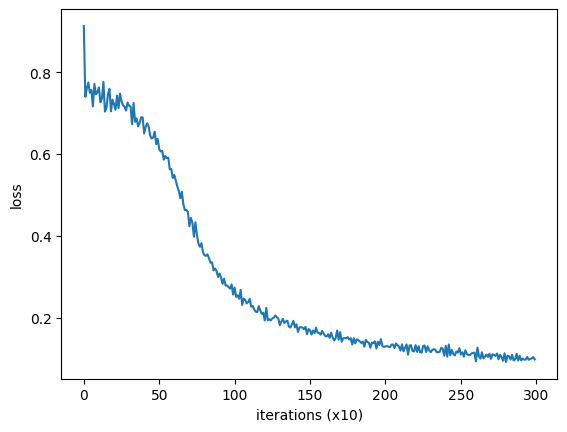

In [14]:
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()